In [9]:
import numpy as np
import matplotlib.pyplot as plt

### Signal Generation Functions

In [10]:
def sinusoidal(frequency, sample_rate, duration, amplitude=1.0):
    t = np.arange(0, duration, 1/sample_rate)
    signal = amplitude * np.sin(2 * np.pi * frequency * t)
    return t, signal

def composite(frequencies, amplitudes, sample_rate, duration):
    t = np.arange(0, duration, 1/sample_rate)
    signal = np.zeros_like(t)
    for freq, amp in zip(frequencies, amplitudes):
        signal += amp * np.sin(2 * np.pi * freq *  t)
    return t, signal

def exponential_decay(frequency, sample_rate, duration, decay_rate, amplitude=1.0):
    t = np.arange(0, duration, 1/sample_rate)
    signal = amplitude * np.exp(-decay_rate * t) * np.sin(2 * np.pi * frequency * t)
    return t, signal

def rectangle(sample_rate, duration, width):
    t = np.arange(0, duration, 1/sample_rate)
    signal = np.where(t < width, 1, 0)  # Rectangle of width `width`
    return t, signal

### Fourier Trasform Functions

In [11]:
def dtft(signal, sample_rate):
    n = len(signal)
    freqs = np.linspace(-sample_rate/2, sample_rate/2, n)
    dtft = np.fft.fftshift(np.fft.fft(signal))
    return freqs, np.abs(dtft)

def dft(signal):
    dft = np.fft.fft(signal)
    return np.abs(dft)

### Plotting functions

In [12]:
def plot_time(t, signal, title='Time Domain Signal'):
    plt.figure(figsize=(10, 4))
    plt.plot(t, signal, label='Signal')
    plt.title(title)
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.show()

def plot_frequency(freqs, spectrum, title='Frequency Spectrum', is_discrete=False):
    plt.figure(figsize=(10, 4))
    if is_discrete:
        plt.stem(freqs, spectrum, basefmt=" ", label="DFT Spectrum")
    else:
        plt.plot(freqs, spectrum, label='DTFT Spectrum')
    plt.title(title)
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Magnitude')
    plt.grid(True)
    plt.show()

### Main Execution

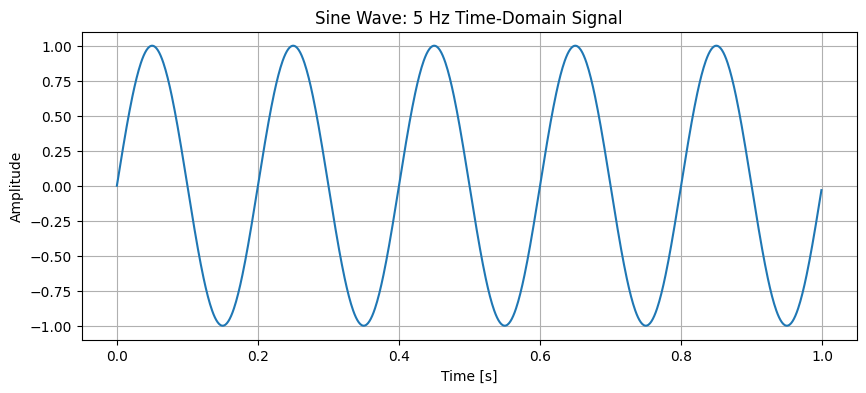

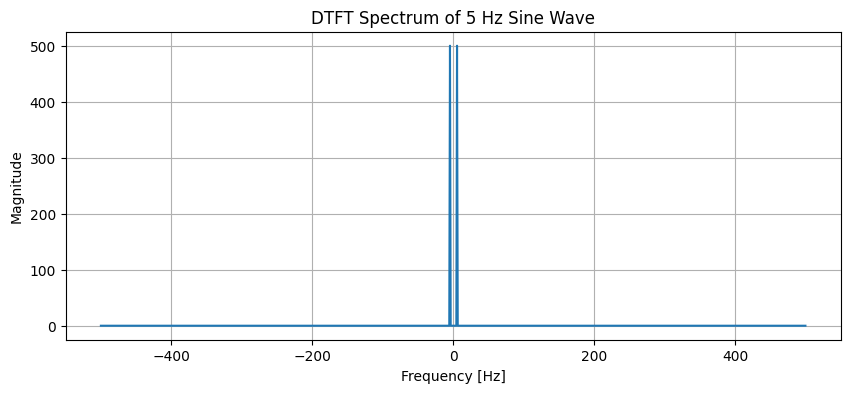

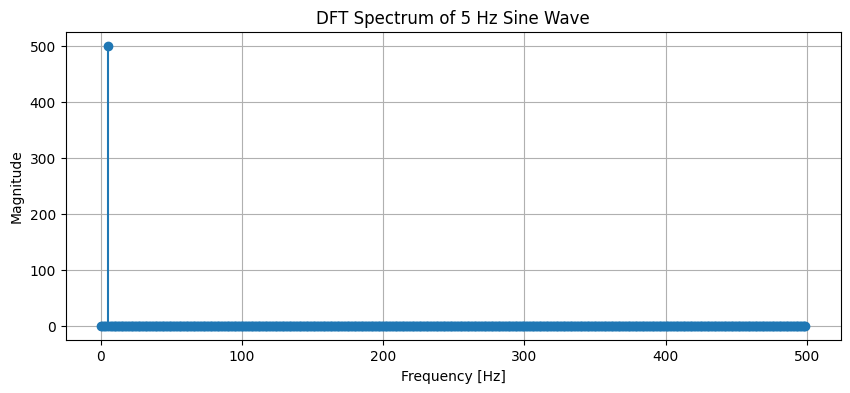

In [13]:
# Question 1
sample_rate = 1000  # 1000 Hz
duration = 1        # 1 second

# 1a. Generate sinusoidal signal
frequency = 5       # 5 Hz
t, sine_wave = sinusoidal(frequency, sample_rate, duration)

# 1b. Plot time-domain waveform
plot_time(t, sine_wave, title='Sine Wave: 5 Hz Time-Domain Signal')

# 1c. Compute and plot DTFT
freqs, dtft_spectrum = dtft(sine_wave, sample_rate)
plot_frequency(freqs, dtft_spectrum, title='DTFT Spectrum of 5 Hz Sine Wave')

# 1d. Compute and plot DFT
dft_spectrum = dft(sine_wave)
frequencies_dft = np.fft.fftfreq(len(dft_spectrum), 1/sample_rate)
plot_frequency(frequencies_dft[:len(dft_spectrum)//2], dft_spectrum[:len(dft_spectrum)//2], title='DFT Spectrum of 5 Hz Sine Wave', is_discrete=True)

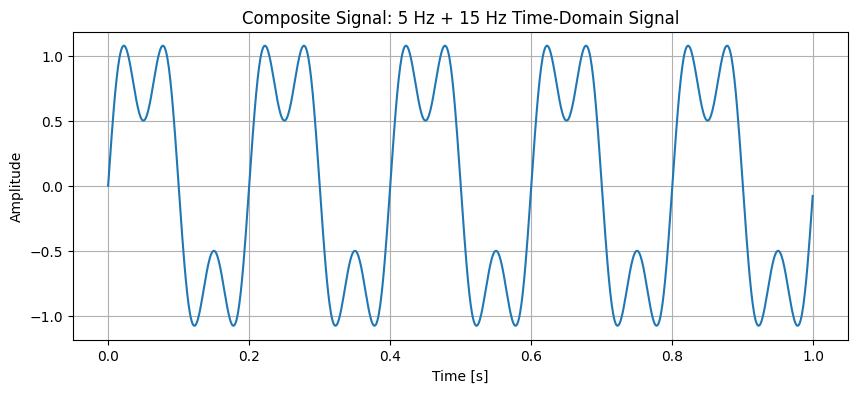

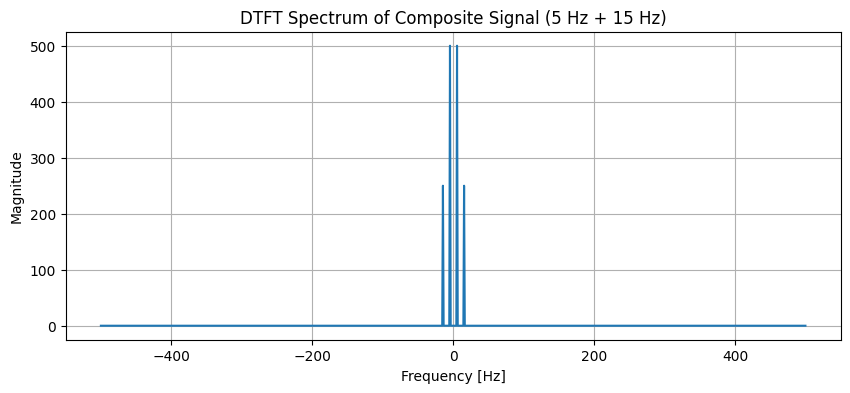

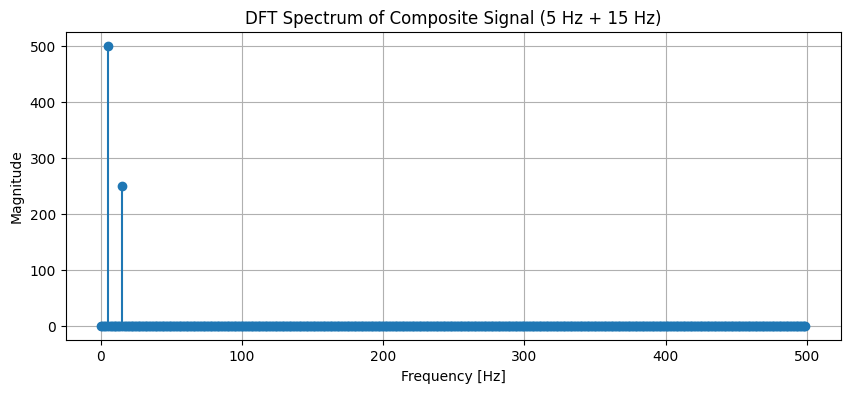

In [14]:
# Question 2
frequencies = [5, 15]
amplitudes = [1, 0.5]

# 2a. Generate composite signal
t_composite, composite_signal = composite(frequencies, amplitudes, sample_rate, duration)

# 2b. Plot time-domain waveform
plot_time(t_composite, composite_signal, title='Composite Signal: 5 Hz + 15 Hz Time-Domain Signal')

# 2c. Compute and plot DTFT
freqs_composite, dtft_composite = dtft(composite_signal, sample_rate)
plot_frequency(freqs_composite, dtft_composite, title='DTFT Spectrum of Composite Signal (5 Hz + 15 Hz)')

# 2d. Compute and plot DFT
dft_composite = dft(composite_signal)
frequencies_dft_composite = np.fft.fftfreq(len(dft_composite), 1/sample_rate)
plot_frequency(frequencies_dft_composite[:len(dft_composite)//2], dft_composite[:len(dft_composite)//2], title='DFT Spectrum of Composite Signal (5 Hz + 15 Hz)', is_discrete=True)


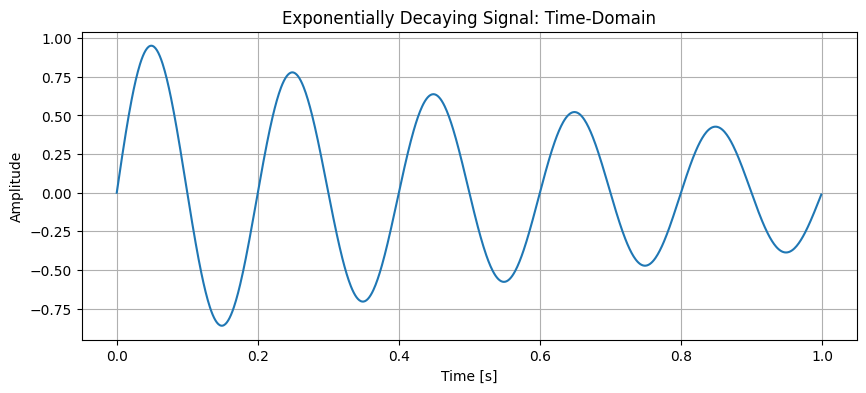

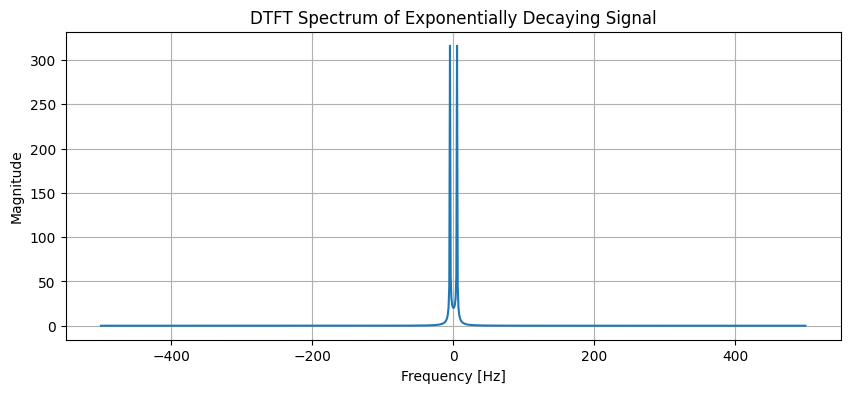

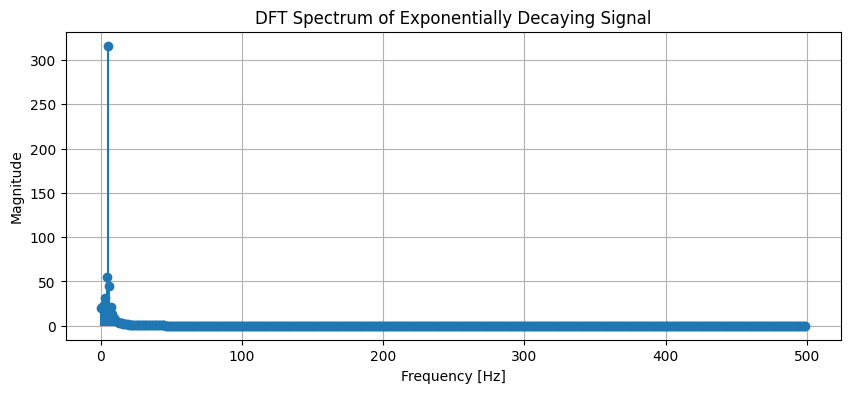

In [15]:
# Question 3
frequency_decay = 5  # Hz
decay_rate = 1  # Exponential decay rate

# 3a. Generate exponentially decaying signal
t_decay, exp_decay_signal = exponential_decay(frequency_decay, sample_rate, duration, decay_rate)

# 3b. Plot time-domain waveform
plot_time(t_decay, exp_decay_signal, title='Exponentially Decaying Signal: Time-Domain')

# 3c. Compute and plot DTFT
freqs_decay, dtft_decay = dtft(exp_decay_signal, sample_rate)
plot_frequency(freqs_decay, dtft_decay, title='DTFT Spectrum of Exponentially Decaying Signal')

# 3d. Compute and plot DFT
dft_decay = dft(exp_decay_signal)
frequencies_dft_decay = np.fft.fftfreq(len(dft_decay), 1/sample_rate)
plot_frequency(frequencies_dft_decay[:len(dft_decay)//2], dft_decay[:len(dft_decay)//2], title='DFT Spectrum of Exponentially Decaying Signal', is_discrete=True)

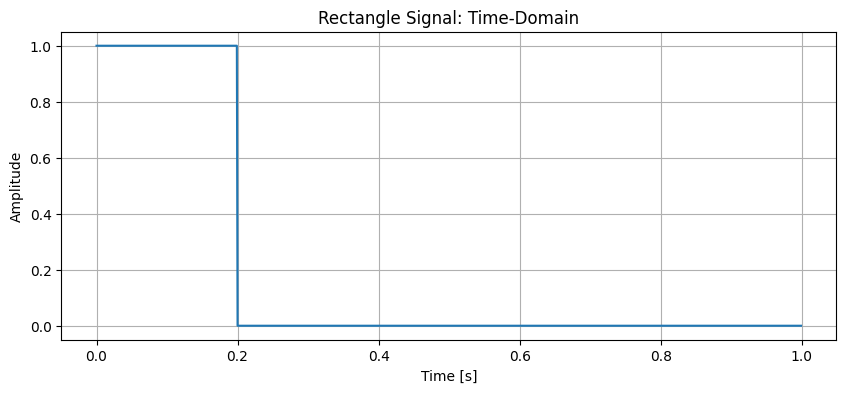

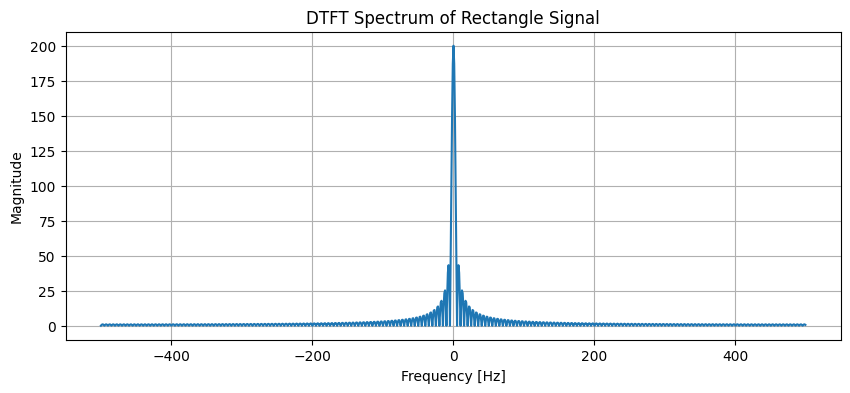

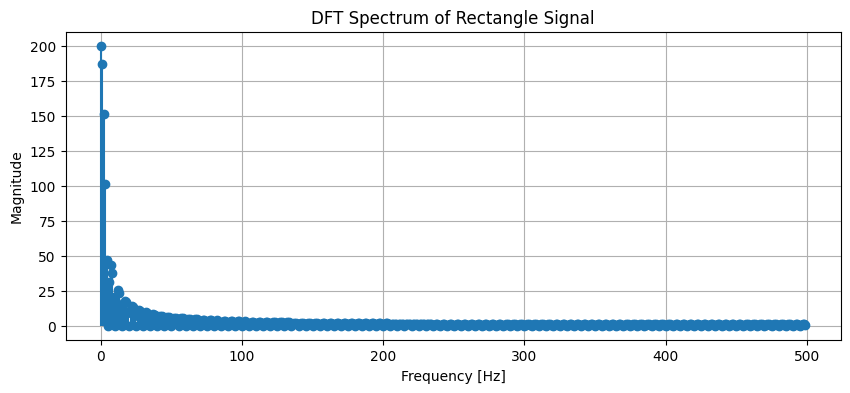

In [16]:
# Question 4
width = 0.2  # Width of the rectangle in seconds

# 4a. Generate rectangular signal
t_rect, rect_signal = rectangle(sample_rate, duration, width)

# 4b. Plot time-domain waveform
plot_time(t_rect, rect_signal, title='Rectangle Signal: Time-Domain')

# 4c. Compute and plot DTFT
freqs_rect, dtft_rect = dtft(rect_signal, sample_rate)
plot_frequency(freqs_rect, dtft_rect, title='DTFT Spectrum of Rectangle Signal')

# 4d. Compute and plot DFT
dft_rect = dft(rect_signal)
frequencies_dft_rect = np.fft.fftfreq(len(dft_rect), 1/sample_rate)
plot_frequency(frequencies_dft_rect[:len(dft_rect)//2], dft_rect[:len(dft_rect)//2], title='DFT Spectrum of Rectangle Signal', is_discrete=True)